In [ ]:
# Importing the necassary libraries
import pandas as pd
import os
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# # We create a directory where we specifically want to save clustering results
directory = "clustering"

if not os.path.exists(directory):
    # Create the directory
    os.mkdir(directory)
    print("Directory created successfully")
else:
    print("Directory already exists")

Directory already exists


In [2]:
# Load data
jobOrder_A = pd.read_csv("jobOrder_A.csv")
jobOrder_B = pd.read_csv("jobOrder_B.csv")

In [3]:
# Drop irrelevant columns for clustering
not_relevantAB = ["LAUNCH_DATE", "PRIMARY_KEY", "MATERIAL_CODE", "CodFam", "CodSubFam"]

jobOrder_A.drop(columns=not_relevantAB, inplace=True)
jobOrder_B.drop(columns=not_relevantAB, inplace=True)

In [5]:
# Additionally drop these 2 columns as they are not part of group A
not_relevantA = ["CYLINDER", "POWER_AXIS"]

jobOrder_A.drop(columns=not_relevantA, inplace=True)

In [4]:
columns_toClusterA = jobOrder_A.columns
columns_toClusterB = jobOrder_B.columns

In [5]:
# Scale data to work better with algorithm
scaler = StandardScaler()

In [23]:
jobOrder_A = jobOrder_A.apply(pd.to_numeric, errors='coerce')
jobOrder_A = scaler.fit_transform(jobOrder_A)
jobOrder_A = pd.DataFrame(jobOrder_A, columns=columns_toClusterA)

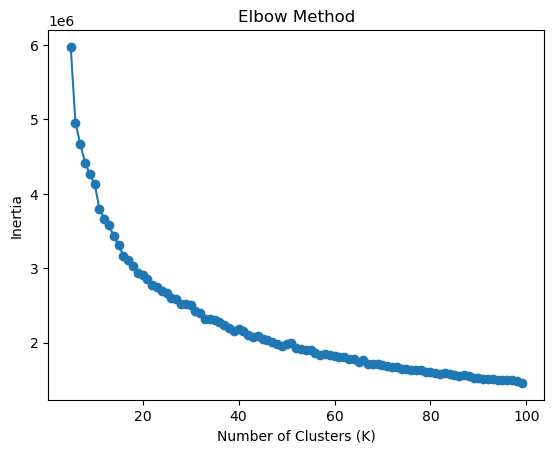

In [9]:
# Plot intertia against number of clasters to make use of the elbow method and determine a number the amount of clusters we want for group A
k_values = range(5, 100)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=8)
    kmeans.fit(jobOrder_A)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, 'o-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Group A')
plt.show()

In [24]:
# After plotting graph we make the decision to use 25 clusters
kmeans = KMeans(n_clusters=25, n_init=8)
kmeans.fit(jobOrder_A)

In [ ]:
# Our final file needs to have the original data for the company to interpret, so we drop the encoded columns we created in the beginning for the clustering
# Ultimately, we add the cluster to wich each rows belongs to
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

jobOrder_A = pd.read_csv("jobOrder_A.csv")
not_relevantA = ["CYLINDER", "POWER_AXIS"]
jobOrder_A.drop(columns=not_relevantA, inplace=True)
not_relevantAB = ["category_material", "category_fam", "category_subfam"]
jobOrder_A.drop(columns=not_relevantAB, inplace=True)

jobOrder_A['Cluster'] = labels
jobOrder_A.head()

,PRIMARY_KEY,MATERIAL_CODE,BASE_RADIUS,POWER,DIAMETER,CENTER_THK,LAUNCH_DATE,CodFam,CodSubFam,month,Cluster
0,FO8973_1_0,3201.0,8.0,-3.50,14.5,0.10,2020-01-02 10:07:00,1.0,5.0,1,12
1,FO9775_2_0,3201.0,8.3,-1.25,14.5,0.12,2020-01-02 05:57:00,1.0,5.0,1,7
2,FO9799_2_0,3201.0,8.3,-2.25,14.5,0.10,2020-01-02 05:25:00,1.0,5.0,1,7
3,FO9799_3_0,3201.0,8.3,-2.25,14.5,0.10,2020-01-02 05:57:00,1.0,5.0,1,7
4,FO9958_2_0,3201.0,8.9,-3.75,15.0,0.10,2020-01-02 09:25:00,1.0,5.0,1,7


In [ ]:
# Save results to find "made to stock" combinations
jobOrder_A.to_csv("clustering/clusterA_kmeans.csv", header=True, index=False)

In [6]:
jobOrder_B = jobOrder_B.apply(pd.to_numeric, errors='coerce')
jobOrder_B = scaler.fit_transform(jobOrder_B)
jobOrder_B = pd.DataFrame(jobOrder_B, columns=columns_toClusterB)

In [7]:
# Plot intertia against number of clasters to make use of the elbow method and determine a number the amount of clusters we want for group B
k_values = range(5, 100)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=8)
    kmeans.fit(jobOrder_B)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, 'o-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Group B')
plt.show()

In [7]:
# After plotting graph we make the decision to use 25 clusters
kmeans = KMeans(n_clusters=25, n_init=8)
kmeans.fit(jobOrder_B)

KMeans(n_clusters=25, n_init=8)

In [ ]:
# Our final file needs to have the original data for the company to interpret, so we drop the encoded columns we created in the beginning for the clustering
# Ultimately, we add the cluster to wich each rows belongs to
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

jobOrder_B = pd.read_csv("jobOrder_B.csv")
not_relevantAB = ["category_material", "category_fam", "category_subfam"]
jobOrder_B.drop(columns=not_relevantAB, inplace=True)

jobOrder_B['Cluster'] = labels
jobOrder_B.head()

,PRIMARY_KEY,MATERIAL_CODE,BASE_RADIUS,POWER,CYLINDER,POWER_AXIS,DIAMETER,CENTER_THK,LAUNCH_DATE,CodFam,CodSubFam,month,Cluster
0,CH6997_5_0,1001.0,8.7,9.0,-0.75,180.0,14.4,0.4268,2020-11-09 15:00:00,1.0,3.0,11,11
1,CH7603_9_0,1001.0,8.7,4.0,-3.25,50.0,14.4,0.3041,2020-11-09 15:00:00,1.0,3.0,11,21
2,CI1456_9_0,1001.0,8.7,0.5,-4.25,180.0,14.4,0.1901,2020-11-09 15:00:00,1.0,3.0,11,22
3,CI1456_A_0,1001.0,8.7,0.5,-4.25,180.0,14.4,0.1901,2020-11-09 15:00:00,1.0,3.0,11,22
4,CI1456_B_0,1001.0,8.7,0.5,-4.25,180.0,14.4,0.1901,2020-11-09 15:00:00,1.0,3.0,11,22


In [ ]:
# Save results to find "made to stock" combinations
jobOrder_B.to_csv("clustering/clusterB_kmeans.csv", header=True, index=False)